In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.utils import to_categorical
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

dataset = pd.read_csv('data-all.csv', sep=';')
dataset.head(10)


Using TensorFlow backend.


,id,size vector,comp opt,label,PAPI_L1_DCM,PAPI_L2_TCM,PAPI_L3_TCM,PAPI_L2_TCA,PAPI_L3_TCA,PAPI_TOT_INS,...,PAPI_LST_INS,PAPI_TOT_CYC,PAPI_FP_OPS,PAPI_L2_TCW,PAPI_L3_TCR,PAPI_L2_TCR,PAPI_L2_ICR,PAPI_L3_ICR,PAPI_L3_ICA,PAPI_L2_ICA
0,1,30000,NF,Copy_E,12251,5748,1021,33908,5748,10137937,...,949383,8222785,142,4162,4619,21541,13665,2041,2041,13665
1,2,30000,NF,Copy_E,10928,2553,92,26995,2553,4608640,...,824921,6040264,81,4124,2093,19197,12489,1234,1234,12489
2,3,30000,NF,Copy_E,11293,3279,109,27715,3279,4881007,...,798175,6304764,81,4172,2129,19509,12659,1205,1205,12659
3,4,30000,NF,Copy_E,10815,2129,90,25858,2129,4475231,...,797604,6138410,81,4179,1931,19087,12390,1112,1112,12390
4,5,30000,NF,Copy_E,10929,2309,88,26605,2309,4557176,...,892885,5843362,81,4122,2098,19281,12548,1248,1248,12548
5,6,30000,NF,Copy_E,10889,2659,78,27138,2659,4532534,...,805694,6566140,83,4177,1760,18862,12229,1064,1064,12229
6,7,30000,NF,Copy_E,10817,2085,77,26290,2085,4448673,...,797828,5907661,81,4131,2021,19286,12507,1186,1186,12507
7,8,30000,NF,Copy_E,10866,2408,88,26547,2408,4537058,...,804726,6201797,81,4172,1805,19100,12404,1081,1081,12404
8,9,30000,NF,Copy_E,10801,2432,88,26616,2432,4591548,...,780495,5927289,81,4156,1924,19063,12378,1116,1116,12378
9,10,30000,NF,Copy_E,10924,2420,93,26412,2420,4549088,...,791824,5891013,81,4118,2237,19533,12685,1344,1344,12685


In [2]:
datasetX = dataset.iloc[:,4:]
#print(list(datasetX.head(0)))
datasetX.head(10)

,PAPI_L1_DCM,PAPI_L2_TCM,PAPI_L3_TCM,PAPI_L2_TCA,PAPI_L3_TCA,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L2_TCH,PAPI_L1_TCM,PAPI_L2_ICH,...,PAPI_LST_INS,PAPI_TOT_CYC,PAPI_FP_OPS,PAPI_L2_TCW,PAPI_L3_TCR,PAPI_L2_TCR,PAPI_L2_ICR,PAPI_L3_ICR,PAPI_L3_ICA,PAPI_L2_ICA
0,12251,5748,1021,33908,5748,10137937,18757494,14848,27599,9707,...,949383,8222785,142,4162,4619,21541,13665,2041,2041,13665
1,10928,2553,92,26995,2553,4608640,8406828,21272,23431,11248,...,824921,6040264,81,4124,2093,19197,12489,1234,1234,12489
2,11293,3279,109,27715,3279,4881007,8938836,22956,23334,11449,...,798175,6304764,81,4172,2129,19509,12659,1205,1205,12659
3,10815,2129,90,25858,2129,4475231,8191044,22352,23032,11343,...,797604,6138410,81,4179,1931,19087,12390,1112,1112,12390
4,10929,2309,88,26605,2309,4557176,8288370,22423,22943,11327,...,892885,5843362,81,4122,2098,19281,12548,1248,1248,12548
5,10889,2659,78,27138,2659,4532534,8247600,22372,23155,11351,...,805694,6566140,83,4177,1760,18862,12229,1064,1064,12229
6,10817,2085,77,26290,2085,4448673,8099928,22246,23146,11316,...,797828,5907661,81,4131,2021,19286,12507,1186,1186,12507
7,10866,2408,88,26547,2408,4537058,8257932,22171,23343,11409,...,804726,6201797,81,4172,1805,19100,12404,1081,1081,12404
8,10801,2432,88,26616,2432,4591548,8369388,22522,23175,11435,...,780495,5927289,81,4156,1924,19063,12378,1116,1116,12378
9,10924,2420,93,26412,2420,4549088,8299638,22350,23446,11276,...,791824,5891013,81,4118,2237,19533,12685,1344,1344,12685


In [3]:
datasetY = dataset.iloc[:,3]
#datasetY

In [4]:
from sklearn.preprocessing import StandardScaler
datasetX_std = StandardScaler().fit_transform(datasetX)
datasetX_std

c:\python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.59376012, -0.48267087, -0.48157305, ..., -0.34800236,
        -0.34800236, -0.18962277],
       [-0.59383567, -0.48292948, -0.48164823, ..., -0.77878143,
        -0.77878143, -0.74183348],
       [-0.59381482, -0.48287071, -0.48164685, ..., -0.79426172,
        -0.79426172, -0.6620071 ],
       ...,
       [-0.59426704, -0.48297853, -0.48164993, ..., -0.9821604 ,
        -0.9821604 , -0.72398994],
       [-0.59427104, -0.48297658, -0.48164944, ..., -0.97682237,
        -0.97682237, -0.73713781],
       [-0.59425773, -0.482968  , -0.48164847, ..., -0.96668011,
        -0.96668011, -0.7103725 ]])

In [5]:
mean_vec = np.mean(datasetX_std, axis=0)

cov_mat = (datasetX_std - mean_vec).T.dot((datasetX_std - mean_vec)) / (datasetX_std.shape[0]-1)

print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00000074 0.87716191 0.87718705 ... 0.94962194 0.94962194 0.96077418]
 [0.87716191 1.00000074 0.99999487 ... 0.80910649 0.80910649 0.82637034]
 [0.87718705 0.99999487 1.00000074 ... 0.80900047 0.80900047 0.82644492]
 ...
 [0.94962194 0.80910649 0.80900047 ... 1.00000074 1.00000074 0.97504901]
 [0.94962194 0.80910649 0.80900047 ... 1.00000074 1.00000074 0.97504901]
 [0.96077418 0.82637034 0.82644492 ... 0.97504901 0.97504901 1.00000074]]


In [6]:
pca = PCA(n_components=57)
pca.fit_transform(datasetX_std)
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.72531971, 0.82979603, 0.90487929, 0.92969594, 0.9429466 ,
       0.95475248, 0.96431073, 0.97113299, 0.97748526, 0.9825286 ,
       0.98656081, 0.99014801, 0.99319081, 0.99525618, 0.99679725,
       0.99814871, 0.9987443 , 0.99920257, 0.99954773, 0.99977117,
       0.99990762, 0.99994104, 0.99996875, 0.99998387, 0.9999933 ,
       0.99999538, 0.9999967 , 0.99999782, 0.99999871, 0.99999923,
       0.99999956, 0.99999971, 0.99999982, 0.99999989, 0.99999995,
       0.99999998, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

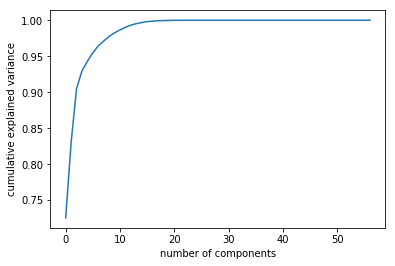

In [7]:
#Explained variance
pca = PCA().fit(datasetX_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

{'Copy_E', 'Add_E', 'Scale_E', 'Triad_E', '2PStencil_E', 'Reduction_E'}
explained variance ratio (first two components): [0.72531971 0.10447631]


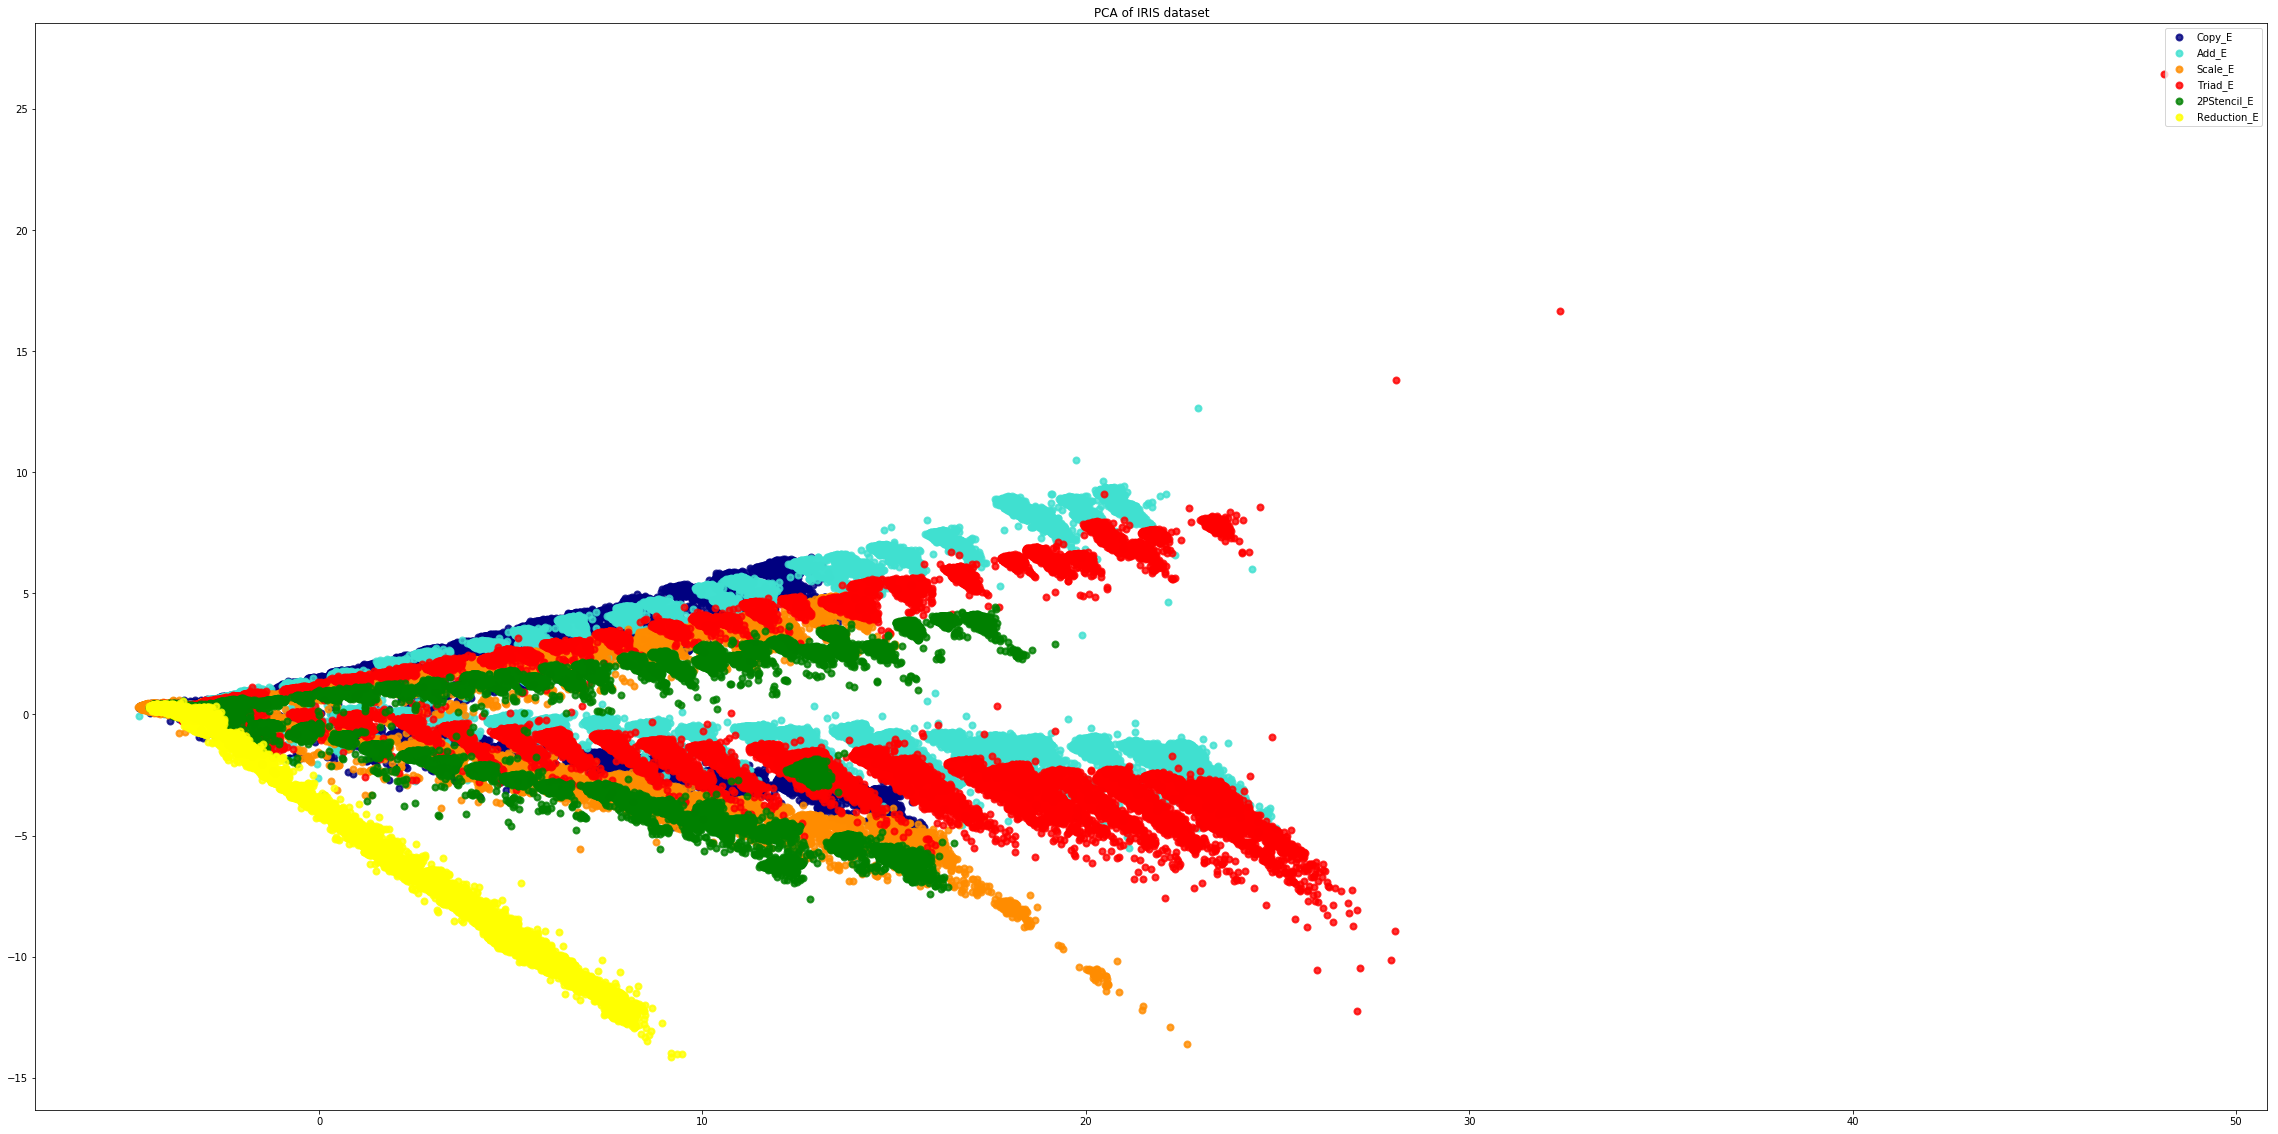

In [23]:
X_r = pca.fit(datasetX_std).transform(datasetX_std)
myset = set(datasetY)
print(myset)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange','red','green','yellow']
lw = 2

for color, target_name in zip(colors, myset):
    plt.scatter(X_r[datasetY == target_name, 0], X_r[datasetY == target_name, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')


plt.rcParams["figure.figsize"] = (100,100)

plt.show()